# <u> NACEP </u>
## 2015-16 CRDC
## AP v. DE Flag Analysis
#### Alijah O'Connor - 2018
------------------------------------------------------------------------------------
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

from my_functions.extra_functions import flag_grouper

%matplotlib inline
sns.set_style('whitegrid')
plt.rc('axes', titlesize = 14, titleweight = 'bold', labelweight = 'bold')

In [2]:
hs = pd.read_csv('../filtered_data/04_filter_final.csv', dtype = {'LEAID':np.object})

# National

### - Overall Breakdowns

In [3]:
hs_total = len(hs)
de_total = len(hs[hs['SCH_DUAL_IND'] == 'Yes'])
de_offering_rate = round(de_total / hs_total * 100, 1) 
ap_total = len(hs[hs['SCH_APENR_IND'] == 'Yes'])
ap_offering_rate = round(ap_total / hs_total * 100, 1)

order = ['# HS Schools', '# DE Schools', 'DE Offering Rate', '# AP Schools', 'AP Offering Rate']

pd.DataFrame({'# HS Schools': hs_total,
              '# DE Schools': de_total,
              'DE Offering Rate': de_offering_rate,
              '# AP Schools': ap_total,
              'AP Offering Rate': ap_offering_rate},
            index = ['National'])[order]

,# HS Schools,# DE Schools,DE Offering Rate,# AP Schools,AP Offering Rate
National,18667,13330,71.4,12756,68.3


## - By Size
(Based on Total Enrollment of School)

In [4]:
"""Create a Size-of-School Classifier"""
hs['total_enrollment'] = hs['TOT_ENR_M'] + hs['TOT_ENR_F']
from my_functions.extra_functions import hs_enrollment_averager
hs['hs_total_enrollment'] = hs_enrollment_averager(hs) # Calculating HS Students from the Total_Enrollments in Schools

In [5]:
"""Assigning Size Groups based on HS Enrollments"""
from my_functions.extra_functions import school_sizer
hs['size_group'] = hs['hs_total_enrollment'].apply(lambda x: school_sizer(x))

In [6]:
de_by_size = flag_grouper(hs, 'size_group', 'DE')
ap_by_size = flag_grouper(hs, 'size_group', 'AP')

hs_by_size = pd.merge(de_by_size, ap_by_size, on = '# of HS Schools')
hs_by_size = hs_by_size.rename({0: '<100', 1: '100-499', 2:'500-1199', 3:'1200+'})
hs_by_size.index.names = ['Student Enrollment']
hs_by_size

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Student Enrollment,,,,,
<100,2358,1331,56.4,333,14.1
100-499,7390,5225,70.7,4100,55.5
500-1199,4543,3409,75.0,4035,88.8
1200+,4376,3365,76.9,4288,98.0


(0, 100)

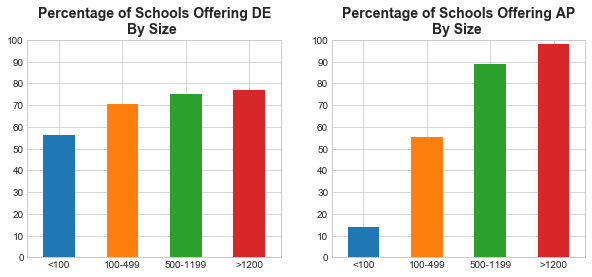

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_size.plot.bar(y = 'DE Offering Rate', ax = ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering DE\nBy Size ')
plt.yticks(np.arange(0,110,10))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,100])

plt.sca(ax2)
hs_by_size.plot.bar(y = 'AP Offering Rate', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering AP\nBy Size ')
plt.yticks(np.arange(0,110, 10))
plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,100])

## - By Locale

In [8]:
"""Creating a Locale Classifer"""
from my_functions.extra_functions import locale_map
hs['locale_group'] = hs['LOCALE15'].map(locale_map)

In [9]:
de_by_locale = flag_grouper(hs, 'locale_group', 'DE')
ap_by_locale = flag_grouper(hs, 'locale_group', 'AP')

hs_by_locale = pd.merge(de_by_locale, ap_by_locale, on = '# of HS Schools')
hs_by_locale = hs_by_locale.rename({0: 'City', 1: 'Rural', 2: 'Suburban', 3: 'Town'})
hs_by_locale.index.names = ['Locale']
hs_by_locale

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Locale,,,,,
City,4109,2301,56.0,3152,76.7
Rural,7438,5853,78.7,3827,51.5
Suburban,4481,3126,69.8,3925,87.6
Town,2639,2050,77.7,1852,70.2


(0, 100)

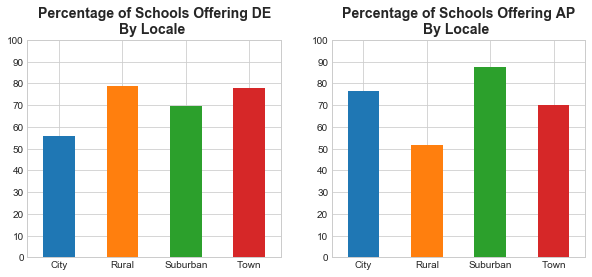

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_locale.plot.bar(y = 'DE Offering Rate', ax = ax1)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering DE\nBy Locale ')
plt.yticks(np.arange(0,110,10))
# plt.xticks([0,1,2,3], [''])
plt.ylim([0,100])

plt.sca(ax2)
hs_by_locale.plot.bar(y = 'AP Offering Rate', ax=ax2)
plt.xticks(rotation = 0)
plt.legend([])
plt.xlabel('')
plt.title('Percentage of Schools Offering AP\nBy Locale ')
plt.yticks(np.arange(0,110, 10))
# plt.xticks([0,1,2,3], ['<100', '100-499', '500-1199', '>1200'])
plt.ylim([0,100])

# - By Ethnicity Quintiles

In [11]:
"""Calculate the percent ethnicity of all schools in the set and group schools into quintiles"""
hs['pct_eth'] = (hs['total_enrollment'] - hs['SCH_ENR_WH_F'] - hs['SCH_ENR_WH_M']) / hs['total_enrollment']
from my_functions.extra_functions import eth_grouper
hs['eth_quintile'] = hs['pct_eth'].apply(lambda pct: eth_grouper(pct))

Text(0.5,0,'Ethnicity Percentage')

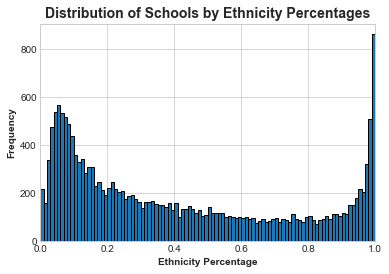

In [12]:
"""What does the distribution of the schools in the dataset look based on ethncitiy?"""
hs.pct_eth.plot.hist(bins=100, xlim = [0,1], edgecolor = 'k')
plt.title('Distribution of Schools by Ethnicity Percentages')
plt.xlabel('Ethnicity Percentage')
# plt.savefig(fname = './Visualizations/By_ethnicity_dist_200.png', dpi = 200)

In [13]:
de_by_eth = flag_grouper(hs, 'eth_quintile', 'DE')
ap_by_eth = flag_grouper(hs, 'eth_quintile', 'AP')

hs_by_eth = pd.merge(de_by_eth, ap_by_eth, on = '# of HS Schools')
hs_by_eth = hs_by_eth.rename({0: '0-20%', 1: '21-40%', 2: '41-60%', 3: '61-80%', 4: '81-100%'})
hs_by_eth.index.names = ['Non-White %']
hs_by_eth

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Non-White %,,,,,
0-20%,7122,5677,79.7,4385,61.6
21-40%,3502,2684,76.6,2493,71.2
41-60%,2414,1755,72.7,1828,75.7
61-80%,1824,1193,65.4,1367,74.9
81-100%,3805,2021,53.1,2683,70.5


Text(0.5,0,'')

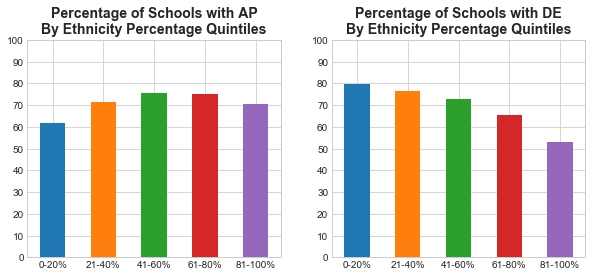

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
hs_by_eth.plot.bar(y = 'AP Offering Rate', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

plt.sca(ax2)
hs_by_eth.plot.bar(y = 'DE Offering Rate', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Ethnicity Percentage Quintiles')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

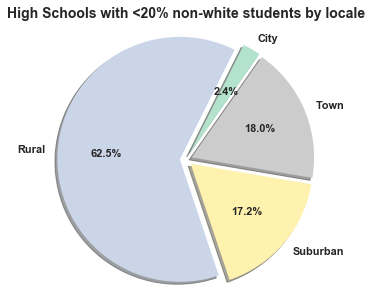

In [27]:
"""Very high percentage non-minority schools by Locale"""
eth_group1_locales = hs[hs.eth_quintile == 1].groupby('locale_group')['LEAID'].count().reset_index()
eth_group1_locales['pct'] = round(eth_group1_locales['LEAID'] / eth_group1_locales['LEAID'].sum() * 100, 1)
eth_group1_locales = eth_group1_locales.set_index('locale_group')

with plt.rc_context({'lines.linewidth': 5, 'font.weight':'bold', 'font.size':11}):
    eth_group1_locales.plot.pie(y='LEAID',autopct='%1.1f%%', 
                            startangle = 55, shadow = True, explode = [.05 for i in range(4)],
                            colormap='Pastel2', figsize = (5,5))
    plt.title('High Schools with <20% non-white students by locale')
    plt.legend([])
    plt.ylabel('')
    plt.xticks(fontdict={'fontweight':'bold'})
    plt.axis('equal')

# - By Vocational Status

In [16]:
de_by_voc = flag_grouper(hs, 'SCH_TYPE', 'DE')
ap_by_voc = flag_grouper(hs, 'SCH_TYPE', 'AP')

hs_by_voc = pd.merge(de_by_voc, ap_by_voc, on = '# of HS Schools')
hs_by_voc = hs_by_voc.rename({0: 'Regular', 1: 'Vocational'})
hs_by_voc.index.names = ['School Type']
hs_by_voc

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
School Type,,,,,
Regular,18308,13124,71.7,12639,69.0
Vocational,359,206,57.4,117,32.6


Text(0.5,0,'')

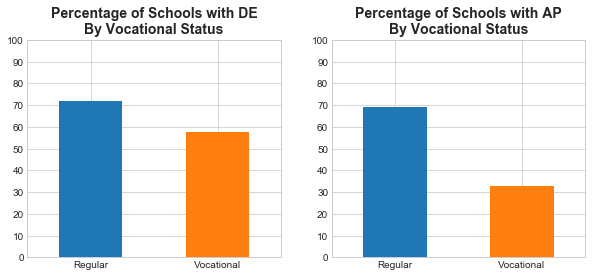

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.sca(ax1)
hs_by_voc.plot.bar(y = 'DE Offering Rate', ax = ax1)
plt.legend([])
plt.title('Percentage of Schools with DE\nBy Vocational Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

plt.sca(ax2)
hs_by_voc.plot.bar(y = 'AP Offering Rate', ax = ax2)
plt.legend([])
plt.title('Percentage of Schools with AP\nBy Vocational Status')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

# - ScatterGeo

In [19]:
# """Map the DE Flags to Values for the ScatterGeo Plot"""
# de_map = {'Yes':1, 'No':0}
# dual_enroll_bin = hs.SCH_DUAL_IND.map(de_map)

# scl = [ [0,"rgb(5, 10, 172)"], [1,"rgb(0, 200, 100)"] ]


# data = [ dict(
#         type = 'scattergeo',
#         locationmode = 'USA-states',
#         lon = hs['LON1516'],
#         lat = hs['LAT1516'],
#         mode = 'markers',
#         marker = dict(
#             size = 5,
#             opacity = 0.8,
#             autocolorscale = False,
#             line = dict(
#                 width=1,
#                 color='rgba(255,255,255,1)'
#             ),
#             colorscale = scl,
#             cmin = 0,
#             color = dual_enroll_bin,
#             cmax = 1,
#         ))]

# layout = dict(
#         geo = dict(
#             scope='usa',
#             projection=dict( type='albers usa' ),
            
#         ),
#     )

# fig = dict( data=data, layout=layout )
# # fig = go.Figure(data = [data], layout = layout)
# iplot(fig, image = 'png', filename = '02_ScatterGeo_DE_1516', image_width = 2750, image_height=2500)

print("To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph")

To see the scattergeo, uncomment code and change the size of the markers (to 3-5) -- Very cumbersome Graph


# By State

In [20]:
de_by_state = flag_grouper(hs, 'LEA_STATE', 'DE', True)
ap_by_state = flag_grouper(hs, 'LEA_STATE', 'AP')

hs_by_state = pd.merge(de_by_state, ap_by_state, on = '# of HS Schools')
hs_by_state = hs_by_state.set_index('LEA_STATE')
hs_by_state.index.names = ['State']
hs_by_state

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
State,,,,,
AK,243,97,39.9,42,17.3
AL,353,298,84.4,226,64.0
AR,273,210,76.9,255,93.4
AZ,402,180,44.8,191,47.5
CA,1432,488,34.1,1163,81.2
CO,360,288,80.0,230,63.9
CT,206,132,64.1,171,83.0
DC,29,6,20.7,28,96.6
DE,36,25,69.4,30,83.3


In [21]:
de_data = dict(type = 'choropleth',
            locations = hs_by_state.index,
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = de_by_state['DE Offering Rate'])
de_layout = dict(title = '2015-2016 DE-Offered Percentages',
              geo = {'scope':'usa'})
de_choromap = go.Figure(data = [de_data], layout = de_layout)

iplot(de_choromap)
# iplot(de_choromap, image = 'png', filename='./Visualizations/by_state_de_choropleth')

In [22]:
ap_data = dict(type = 'choropleth',
            locations = hs_by_state.index,
            locationmode = 'USA-states',
            colorscale = [[0.0, 'rgb(255,255,255)'], [.2, 'rgb(255,221,221)'], [.4, 'rgb(255, 200, 200)'], [0.8, 'rgb(255, 50, 50)'], [1.0, 'rgb(180,0,0)']],
            reversescale = False,
            z = ap_by_state['AP Offering Rate'])
ap_layout = dict(title = '2015-2016 AP-Offered Percentages',
              geo = {'scope':'usa'})
ap_choromap = go.Figure(data = [ap_data], layout = ap_layout)

iplot(ap_choromap)
# iplot(ap_choromap, image = 'png', filename='./Visualizations/by_state_ap_choropleth')

# By Region

In [23]:
"""Categorize schools into regions"""
from my_functions.extra_functions import region_mapper
hs['region_accred'] = hs['LEA_STATE'].apply(lambda x: region_mapper(x))

In [24]:
de_by_region = flag_grouper(hs, 'region_accred', 'DE', True)
ap_by_region = flag_grouper(hs, 'region_accred', 'AP')

hs_by_region = pd.merge(de_by_region, ap_by_region, on = '# of HS Schools')
hs_by_region = hs_by_region.set_index('region_accred')
hs_by_region.index.names = ['Regions']
hs_by_region

,# of HS Schools,# of DE Schools,DE Offering Rate,# of AP Schools,AP Offering Rate
Regions,,,,,
HLC,7156,5596,78.2,4085,57.1
MSCHE,2590,1452,56.1,2133,82.4
NEASC,884,506,57.2,736,83.3
NWCCU,1468,924,62.9,765,52.1
SACS,5074,4307,84.9,3832,75.5
WASC,1495,545,36.5,1205,80.6


Text(0.5,0,'')

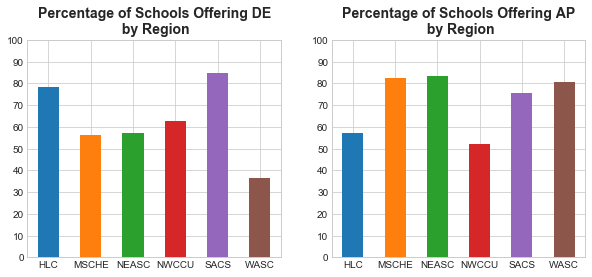

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,4))

plt.sca(ax1)
hs_by_region.plot.bar(y = 'DE Offering Rate', ax=ax1)
plt.title('Percentage of Schools Offering DE\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')

plt.sca(ax2)
hs_by_region.plot.bar(y = 'AP Offering Rate', ax=ax2)
plt.title('Percentage of Schools Offering AP\n by Region')
plt.xticks(rotation = 0)
plt.legend([])
plt.yticks(np.arange(0,110,10))
plt.ylim([0,100])
plt.xlabel('')